# T√¢che

Ce projet a pour but d‚Äôanalyser un jeu de donn√©es issu des ventes Amazon afin de comprendre quels produits se vendent le mieux, quelles cat√©gories sont les plus rentables, et comment les diff√©rents indicateurs commerciaux sont li√©s.

Pour cela, j‚Äôai :
1. Nettoy√© et pr√©par√© les donn√©es pour les rendre exploitables.
2. Calcul√© des statistiques descriptives (chiffre d‚Äôaffaires, quantit√©s vendues, marges).
3. Visualis√© les r√©sultats avec des graphiques pour mieux rep√©rer les tendances.
4. Identifi√© les produits et cat√©gories les plus performants.
5. Tir√© des enseignements utiles pour am√©liorer le pilotage commercial.

Ce projet illustre comment l‚Äôanalyse de donn√©es peut aider √† **prendre de meilleures d√©cisions** √† partir d‚Äôun simple tableau de ventes.

# Objectifs

L‚Äôobjectif de cette analyse est de tirer des enseignements concrets √† partir des donn√©es de ventes Amazon, afin de mieux comprendre les leviers de performance commerciale.

Plus pr√©cis√©ment, ce projet vise √† :
- Identifier les produits et cat√©gories qui g√©n√®rent le plus de chiffre d‚Äôaffaires.
- Comprendre la relation entre le prix, les √©valuations et les ventes.
- Mettre en √©vidence les produits les plus rentables ou les plus populaires.
- Explorer les caract√©ristiques qui influencent le comportement d‚Äôachat.
- Fournir des pistes d‚Äôoptimisation pour orienter les d√©cisions commerciales.

L‚Äôanalyse permet ainsi de transformer un simple tableau de ventes en recommandations actionnables pour le marketing, le d√©veloppement produit ou la strat√©gie.

In [634]:
# !pip install seaborn
# !pip install scipy
# !pip install matplotlib
# !pip install scikit-learn
# !pip install textblob

In [635]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

%matplotlib inline

In [636]:
# Chargement et cr√©ation du dataframe
df = pd.read_csv('amazon.csv')

In [637]:
# Option pour afficher toutes les colonnes
pd.set_option('display.max_columns', None)

In [638]:
# Aper√ßu des donn√©es
df.head()

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ‚Çπ399   
1  Computers&Accessories|Accessories&Peripherals|...             ‚Çπ199   
2  Computers&Accessories|Accessories&Peripherals|...             ‚Çπ199   
3  Computers&Accessories|Accessories&Peripherals|...             ‚Çπ329   
4  Computers&Accessories|Accessories&Peripherals|...             ‚Çπ154   

  actual_price discount_percentage rating rating_count  \
0       ‚Çπ1,099                 64%    4.2       24,269   
1         ‚Çπ349                 43%    4.0       43,994   
2       ‚Çπ1,899                 90%    3.9        7,928   
3         ‚Çπ699                 53%    4.2       94,363   
4         ‚Çπ399                 61%    4.2       16,905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  „Äê Fast Charger& Data Sync„Äë-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

In [639]:
# Apper√ßu des noms de colonnes
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [640]:
# Taille du dataframe
print(f"Le dataframe a {df.shape[0]} lignes et {df.shape[1]} colonnes")

Le dataframe a 1465 lignes et 16 colonnes


In [641]:
# Informations sur le dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [642]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

Le dataset contient 1465 lignes et 16 colonnes.
Tous les types de donn√©es des colonnes sont des objets.
Les colonnes sont :

- 'product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link'

Il y a quelques valeurs manquantes dans le dataset, que nous examinerons et traiterons plus tard dans le notebook.

In [643]:
# Changement du type de donn√©es pour les colonnes 'discounted_price' et 'actual_price'
df['discounted_price'] = df['discounted_price'].str.replace('‚Çπ', '')
df['discounted_price'] = df['discounted_price'].str.replace(',', '')
df['discounted_price'] = df['discounted_price'].astype(float)

df['actual_price'] = df['actual_price'].str.replace('‚Çπ', '')
df['actual_price'] = df['actual_price'].str.replace(',', '')
df['actual_price'] = df['actual_price'].astype(float)

In [644]:
# Changement du type de donn√©es et des valeurs dans le pourcentage de r√©duction
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)
df['discount_percentage'] = df['discount_percentage'] / 100

In [645]:
# Recherche de cha√Ænes inhabituelles dans la colonne des √©valuations
df['rating'].value_counts()

rating
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
3.0      3
4.8      3
5.0      3
2.8      2
3.2      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: count, dtype: int64

In [646]:
# Check d'une valeur √©trange
df.query('rating == "|"')

product_id                                       product_name  \
1279  B08L12N5H1  Eureka Forbes car Vac 100 Watts Powerful Sucti...   

                                               category  discounted_price  \
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...            2099.0   

      actual_price  discount_percentage rating rating_count  \
1279        2499.0                 0.16      |          992   

                                          about_product  \
1279  No Installation is provided for this product|1...   

                                                user_id  \
1279  AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...   

                                              user_name  \
1279  Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...   

                                              review_id  \
1279  R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...   

                                           review_title  \
1279  Decent product,doesn't pick up sand,Ok ok,Must...   

                                         review_content  \
1279  Does the job well,doesn't work on sand. though...   

                                               img_link  \
1279  https://m.media-amazon.com/images/W/WEBP_40237...   

                                           product_link  
1279  https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...

J'ai trouv√© la note de ce produit sur Amazon en recherchant l'ID produit sur leur site officiel (amazon.in).

La note est de 3.9. Je vais donc attribuer une note de 3.9 √† cet article.

In [647]:
# Modification de la valeur √©trange
df['rating'] = df['rating'].replace('|', 3.9).astype(float)

In [648]:
# Changement du type de donn√©es pour la colonne 'rating_count'
df['rating_count'] = df['rating_count'].str.replace(',', '').astype('float64')

In [649]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

# Statistiques descriptives

Les statistiques descriptives sont un ensemble de mesures quantitatives qui r√©sument et d√©crivent les principales caract√©ristiques d'un jeu de donn√©es.

In [650]:
df.describe()

discounted_price   actual_price  discount_percentage       rating  \
count       1465.000000    1465.000000          1465.000000  1465.000000   
mean        3125.310874    5444.990635             0.476915     4.096451   
std         6944.304394   10874.826864             0.216359     0.291620   
min           39.000000      39.000000             0.000000     2.000000   
25%          325.000000     800.000000             0.320000     4.000000   
50%          799.000000    1650.000000             0.500000     4.100000   
75%         1999.000000    4295.000000             0.630000     4.300000   
max        77990.000000  139900.000000             0.940000     5.000000   

        rating_count  
count    1463.000000  
mean    18295.541353  
std     42753.864952  
min         2.000000  
25%      1186.000000  
50%      5179.000000  
75%     17336.500000  
max    426973.000000

Toutes les colonnes √©taient de type objet, donc j'ai converti certaines en float.

Il y a 4 colonnes num√©riques selon le code Python ou les statistiques descriptives de la fonction describe de Python.

# Gestion des valeurs manquantes

Traiter les valeurs manquantes est crucial pour obtenir des analyses pr√©cises des donn√©es.

In [651]:
df.isnull().sum().sort_values(ascending=False)

rating_count           2
product_id             0
category               0
product_name           0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [652]:
# Calcul du pourcentage de valeurs manquantes
round(df.isnull().sum()/len(df)*100, 2).sort_values(ascending=False)

rating_count           0.14
product_id             0.00
category               0.00
product_name           0.00
discounted_price       0.00
actual_price           0.00
discount_percentage    0.00
rating                 0.00
about_product          0.00
user_id                0.00
user_name              0.00
review_id              0.00
review_title           0.00
review_content         0.00
img_link               0.00
product_link           0.00
dtype: float64

In [653]:
# Trouver le nombre de valeurs manquantes
df.isnull().sum().sum().item()

2

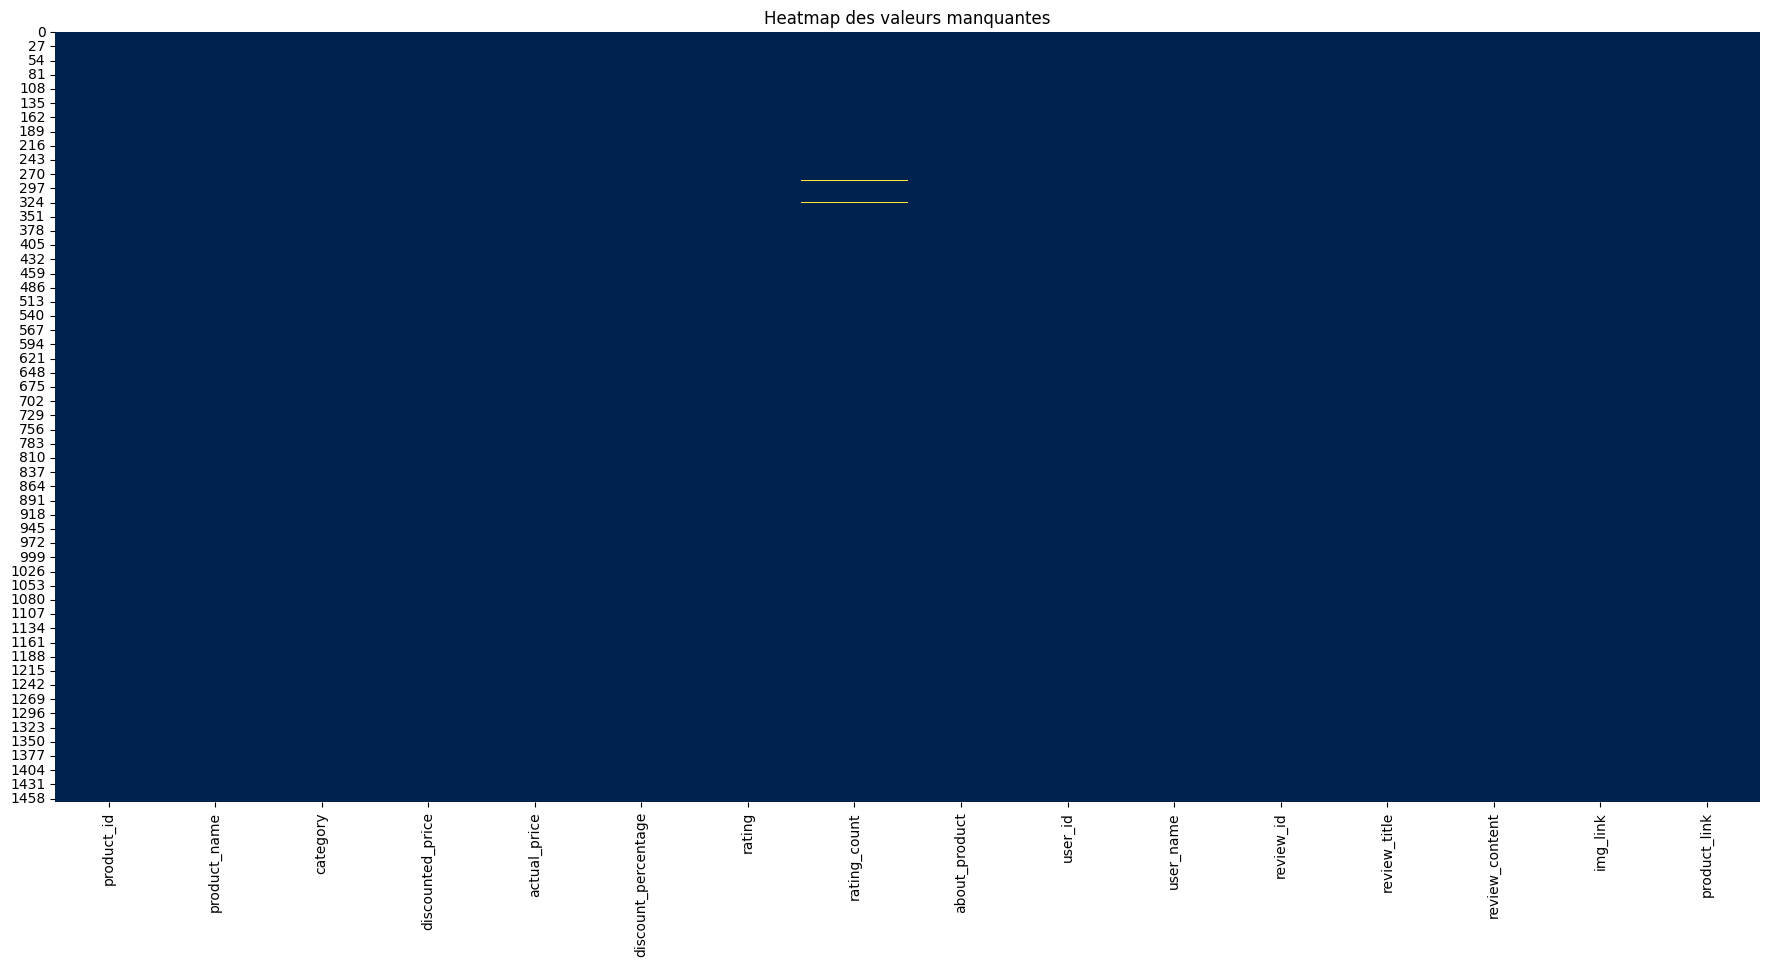

In [654]:
# Visualisation des valeurs manquantes
plt.figure(figsize=(22, 10))
plt.title("Heatmap des valeurs manquantes")
sns.heatmap(df.isnull(), cbar=False, cmap='cividis')
plt.show()

Nous ne visualisons que les lignes o√π il y a des valeurs nulles dans la colonne.


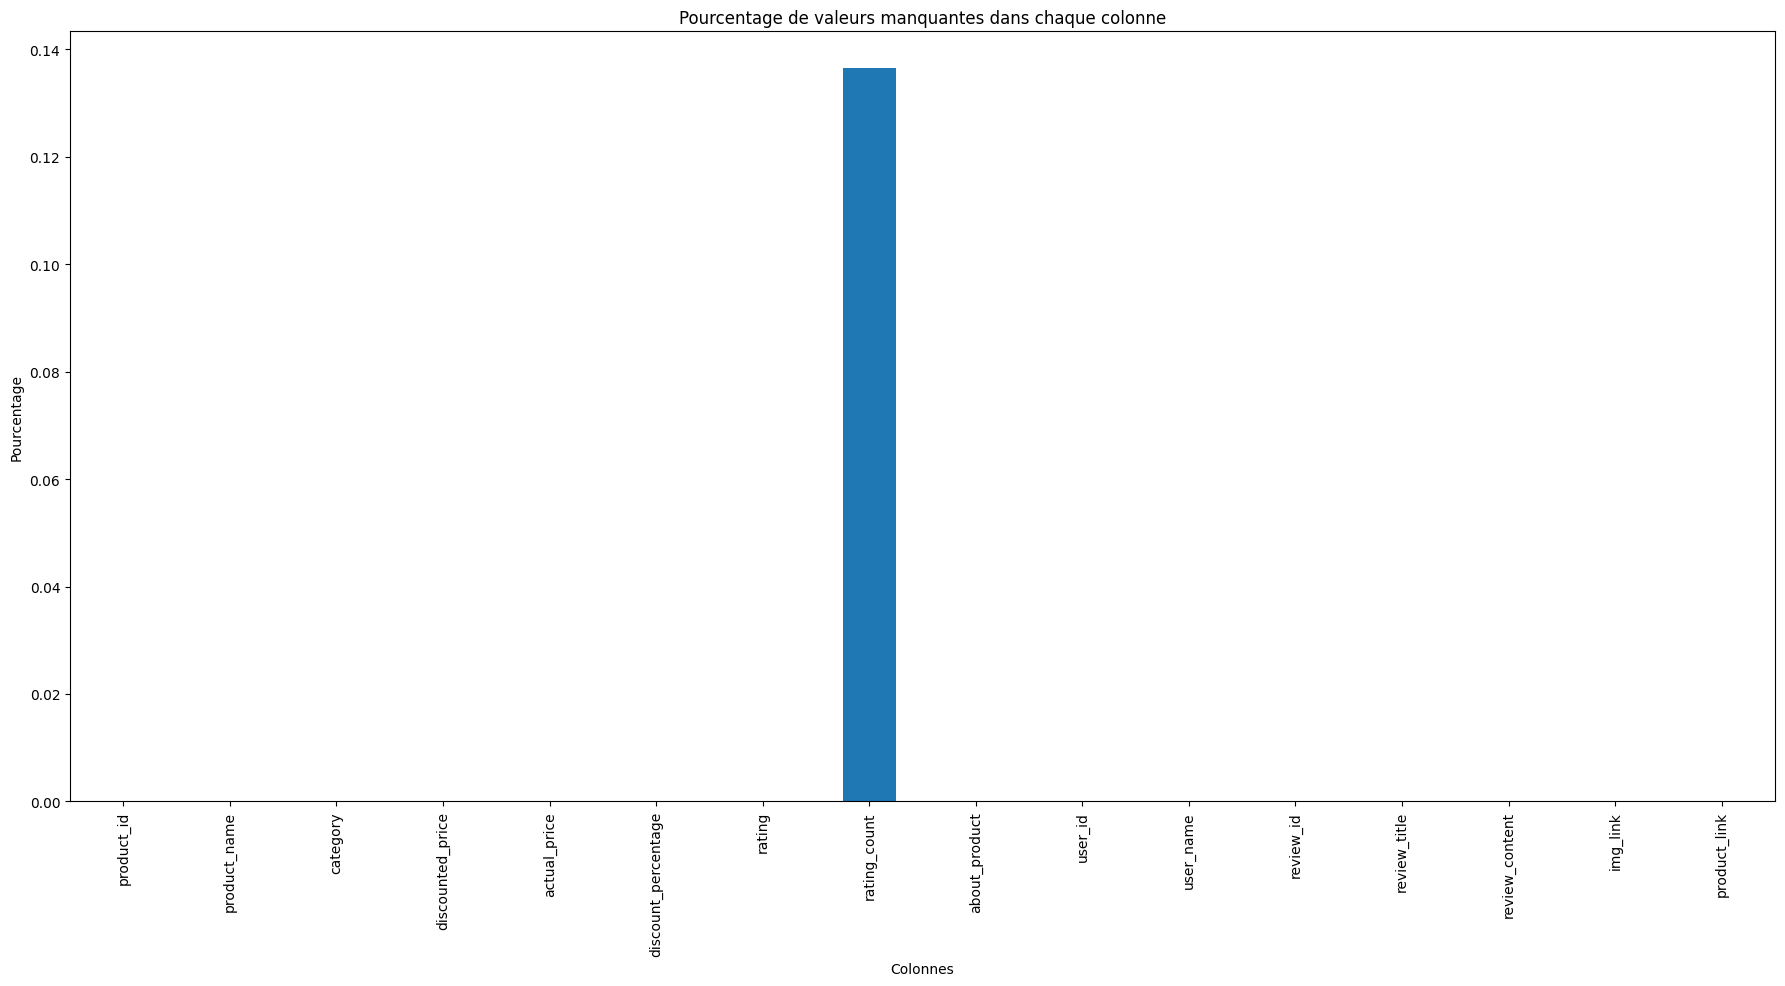

In [655]:
# tracer les valeurs nulles par leur pourcentage dans chaque colonne
plt.figure(figsize=(22, 10))
# tracer les valeurs nulles par leur pourcentage dans chaque colonne
pourcentage_manquant = df.isnull().sum()/len(df)*100
pourcentage_manquant.plot(kind='bar')
# ajouter les √©tiquettes
plt.xlabel('Colonnes')
plt.ylabel('Pourcentage')
plt.title('Pourcentage de valeurs manquantes dans chaque colonne')

print("Nous ne visualisons que les lignes o√π il y a des valeurs nulles dans la colonne.")

In [656]:
# Afficher les lignes o√π il y a des valeurs nulles dans la colonne
df[df['rating_count'].isnull()].head(5)

product_id                                       product_name  \
282  B0B94JPY2N  Amazon Brand - Solimo 65W Fast Charging Braide...   
324  B0BQRJ3C47  REDTECH USB-C to Lightning Cable 3.3FT, [Apple...   

                                              category  discounted_price  \
282  Computers&Accessories|Accessories&Peripherals|...             199.0   
324  Computers&Accessories|Accessories&Peripherals|...             249.0   

     actual_price  discount_percentage  rating  rating_count  \
282         999.0                 0.80     3.0           NaN   
324         999.0                 0.75     5.0           NaN   

                                         about_product  \
282  USB C to C Cable: This cable has type C connec...   
324  üíé[The Fastest Charge] - This iPhone USB C cabl...   

                          user_id    user_name      review_id  \
282  AE7CFHY23VAJT2FI4NZKKP6GS2UQ       Pranav   RUB7U91HVZ30   
324  AGJC5O5H5BBXWUV7WRIEIOOR3TVQ  Abdul Gafur  RQXD5SAMMPC6L   

                                     review_title  \
282  The cable works but is not 65W as advertised   
324                               Awesome Product   

                                        review_content  \
282  I have a pd supported car charger and I bought...   
324  Quick delivery.Awesome ProductPacking was good...   

                                              img_link  \
282  https://m.media-amazon.com/images/W/WEBP_40237...   
324  https://m.media-amazon.com/images/I/31-q0xhaTA...   

                                          product_link  
282  https://www.amazon.in/Amazon-Brand-Charging-Su...  
324  https://www.amazon.in/REDTECH-Lightning-Certif...

In [657]:
# Remplacer les valeurs manquantes par la m√©diane
df['rating_count'] = df.rating_count.fillna(value=df['rating_count'].median())

In [658]:
df.isnull().sum().sort_values(ascending = False)

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

√âtape 1 : Nous avons nettoy√© le jeu de donn√©es des valeurs nulles

# Gestion des doublons

Supprimer les doublons est essentiel pour obtenir des analyses pr√©cises et fiables.

Les doublons peuvent fausser les statistiques et surrepr√©senter certaines donn√©es.

In [659]:
# Trouver les doublons
bool(df.duplicated().any())

False

In [660]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [661]:
any_duplicates = df.duplicated(subset=['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link']).any()

In [662]:
bool(any_duplicates)

False

√âtape 2 : Aucun doublon trouv√©

# 2. Data Visualization

Nuage de points

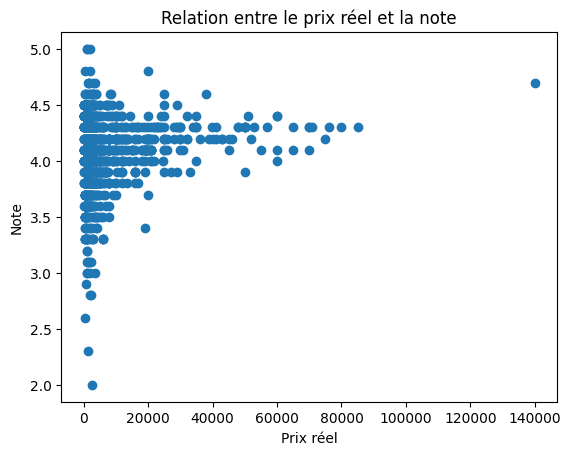

In [663]:
# Tracer actual_price par rapport √† rating
plt.scatter(df['actual_price'], df['rating'])
plt.title('Relation entre le prix r√©el et la note')
plt.xlabel('Prix r√©el')
plt.ylabel('Note')
plt.show()

- La qualit√© per√ßue ne d√©pend pas du prix.
- Les produits peu chers peuvent satisfaire les clients autant, voire plus, que les produits plus chers.

In [664]:
# ne pas afficher les avertissements
import warnings
warnings.filterwarnings('ignore')

Histogramme

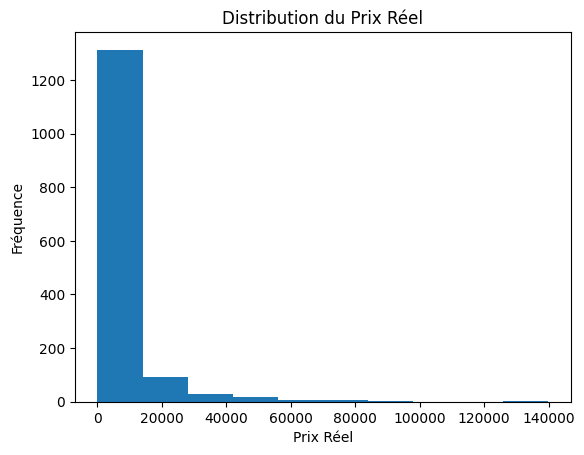

In [665]:
# Tracer la distribution de actual_price
plt.hist(df['actual_price'])
plt.title('Distribution du Prix R√©el')
plt.xlabel('Prix R√©el')
plt.ylabel('Fr√©quence')
plt.show()

- Le c≈ìur du business Amazon semble reposer sur les produits d‚Äôentr√©e de gamme.
- Les produits √† prix tr√®s √©lev√© ne constituent qu‚Äôune niche marginale.
- Il est recommand√© de se focaliser sur les tranches de prix dominantes (ex : 0 √† 10 000) pour une analyse pertinente des performances.

In [666]:
from sklearn.preprocessing import LabelEncoder
# encoder les variables cat√©gorielles avec un label

le_product_id = LabelEncoder()
le_category = LabelEncoder()
le_review_id = LabelEncoder()
le_review_content = LabelEncoder()
le_product_name = LabelEncoder()
le_user_name = LabelEncoder()
le_about_product = LabelEncoder()
le_user_id = LabelEncoder()
le_review_title = LabelEncoder()
le_img_link = LabelEncoder()
le_product_link = LabelEncoder()


df['product_id'] = le_product_id.fit_transform(df['product_id'])
df['category'] = le_category.fit_transform(df['category'])
df['review_id'] = le_review_id.fit_transform(df['review_id'])
df['review_content'] = le_review_content.fit_transform(df['review_content'])
df['product_name'] = le_product_name.fit_transform(df['product_name'])
df['user_name'] = le_user_name.fit_transform(df['user_name'])
df['about_product'] = le_about_product.fit_transform(df['about_product'])
df['user_id'] = le_user_id.fit_transform(df['user_id'])
df['review_title'] = le_review_title.fit_transform(df['review_title'])
df['img_link'] = le_img_link.fit_transform(df['img_link'])
df['product_link'] = le_product_link.fit_transform(df['product_link'])

Heatmap

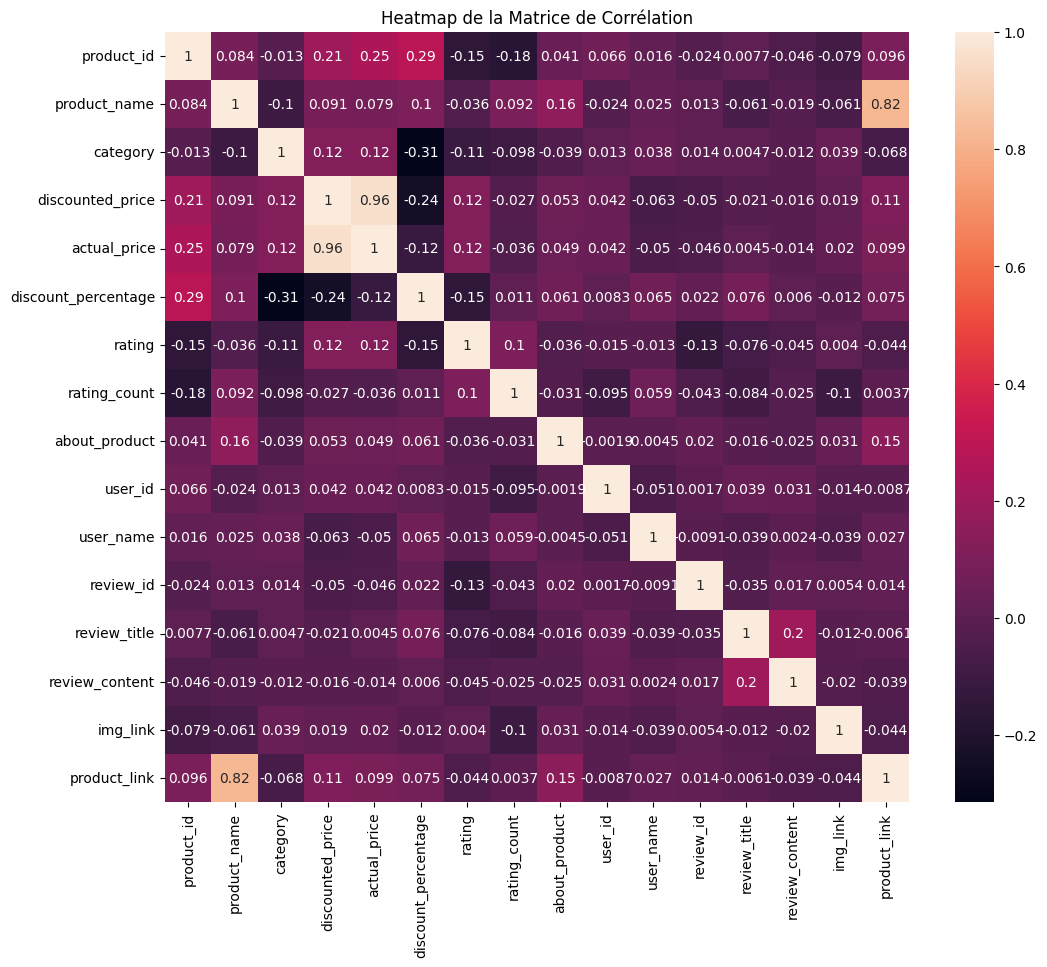

In [667]:
# Tracer la matrice de corr√©lation avec une taille de figure plus grande
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Heatmap de la Matrice de Corr√©lation")
plt.show()

- Les notes ne d√©pendent pas du prix : il faut donc chercher ailleurs (description, service, qualit√© r√©elle).
- Les produits avec des remises √©lev√©es sont souvent des produits moins chers, peut-√™tre pour booster leur visibilit√©.
- La matrice permet de valider les intuitions vues dans les autres graphiques : tr√®s utile pour appuyer tes conclusions.

Analyse de corr√©lation

                     product_id  product_name  category  discounted_price  \
product_id             1.000000      0.084089 -0.012565          0.206448   
product_name           0.084089      1.000000 -0.103778          0.090665   
category              -0.012565     -0.103778  1.000000          0.119365   
discounted_price       0.206448      0.090665  0.119365          1.000000   
actual_price           0.246733      0.078567  0.122451          0.961915   
discount_percentage    0.289514      0.101913 -0.314465         -0.242412   
rating                -0.149105     -0.035592 -0.109424          0.120386   
rating_count          -0.175530      0.092450 -0.098421         -0.027081   
about_product          0.041404      0.158263 -0.038753          0.052618   
user_id                0.065688     -0.024093  0.012707          0.041731   
user_name              0.016145      0.024598  0.037822         -0.063069   
review_id             -0.024282      0.013492  0.014015         -0.049757   

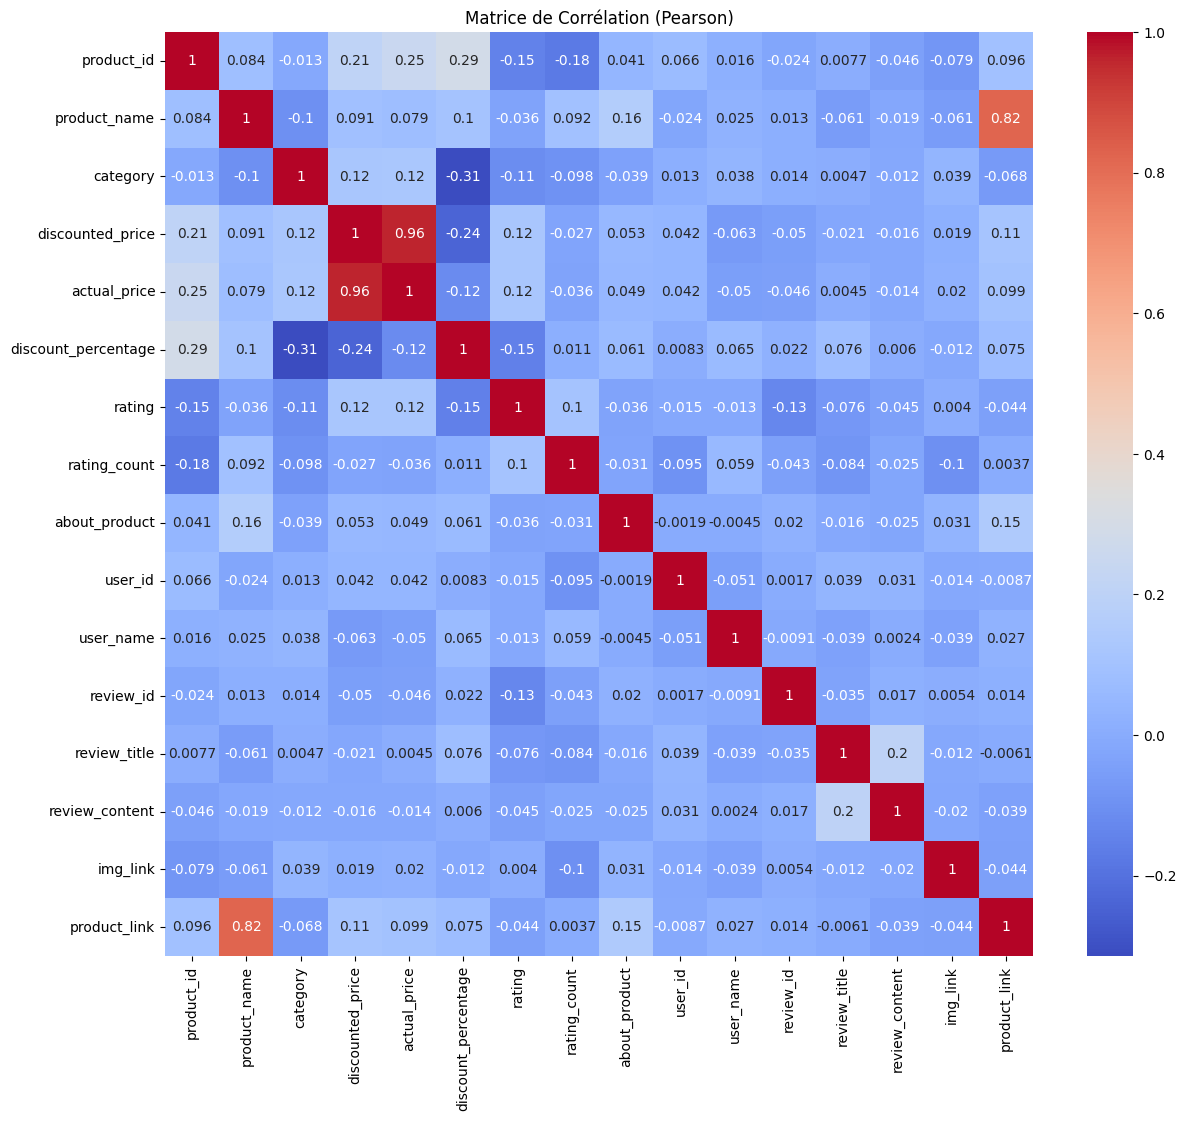

                     product_id  product_name  category  discounted_price  \
product_id             1.000000      0.083112 -0.013553          0.146237   
product_name           0.083112      1.000000 -0.106193          0.056597   
category              -0.013553     -0.106193  1.000000          0.360733   
discounted_price       0.146237      0.056597  0.360733          1.000000   
actual_price           0.269064      0.105719  0.277291          0.932787   
discount_percentage    0.271879      0.106467 -0.322090         -0.372991   
rating                -0.144268     -0.061395 -0.101758          0.079412   
rating_count          -0.406559      0.128565 -0.171893          0.122296   
about_product          0.041118      0.157675 -0.048319         -0.056144   
user_id                0.065228     -0.023810  0.015389          0.079048   
user_name              0.016859      0.024479  0.038735         -0.018599   
review_id             -0.024644      0.015269  0.016119         -0.048420   

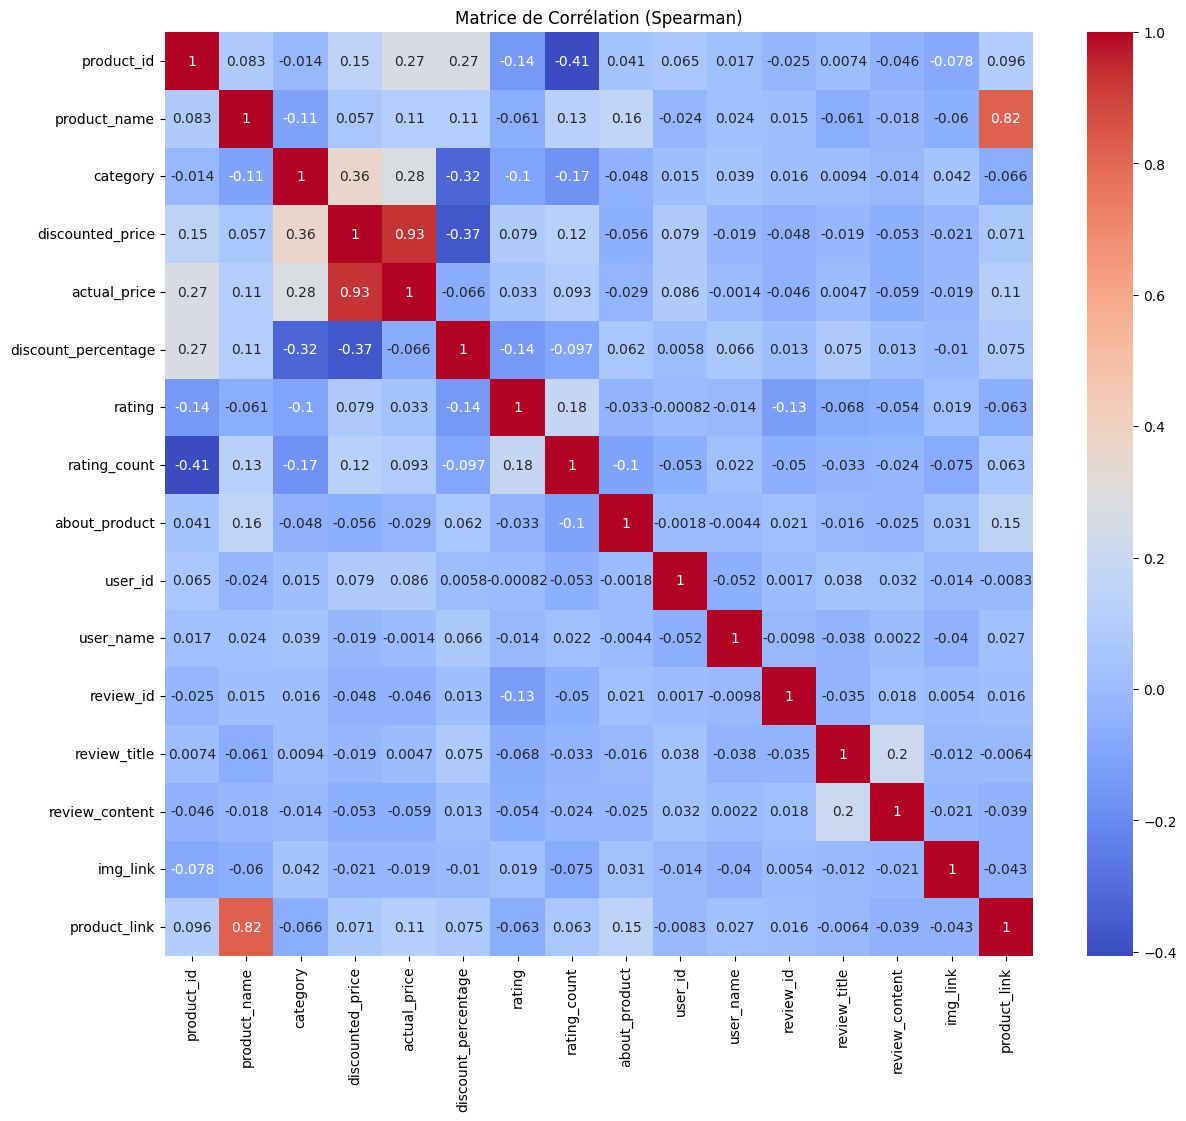

In [668]:
# Calculer les coefficients de corr√©lation de Pearson
correlation_matrix = df.corr()

# Imprimer la matrice de corr√©lation
print(correlation_matrix)

# Cr√©er une carte thermique pour visualiser les corr√©lations
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice de Corr√©lation (Pearson)")
plt.show()

# Calculer les coefficients de corr√©lation de Spearman (pour les relations non lin√©aires)
spearman_correlation_matrix = df.corr(method="spearman")

# Imprimer la matrice de corr√©lation de Spearman
print(spearman_correlation_matrix)

# Cr√©er une carte thermique pour visualiser les corr√©lations de Spearman
plt.figure(figsize=(14, 12))
sns.heatmap(spearman_correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice de Corr√©lation (Spearman)")
plt.show()

In [669]:
# Calculer le coefficient de corr√©lation entre le prix du produit et les ventes
correlation_coefficient = np.corrcoef(df['actual_price'], df['rating'])[0, 1]

# Imprimer le coefficient de corr√©lation
print(correlation_coefficient)

0.12174449609998352


# Regroupement et Agr√©gation

In [670]:
# Calculer la moyenne des ventes par cat√©gorie de produit
grouped_df = df.groupby('category')['rating'].mean()

# Imprimer la moyenne des ventes par cat√©gorie de produit
print(grouped_df)

category
0      3.800000
1      4.150000
2      3.500000
3      3.600000
4      4.050000
         ...   
206    4.250000
207    4.150000
208    4.300000
209    4.133333
210    4.300000
Name: rating, Length: 211, dtype: float64


Calculer les statistiques sommaires pour les groupes

In [671]:
# Note moyenne par cat√©gorie
moyenne_notes_par_categorie = df.groupby('category')['rating'].mean()
print(moyenne_notes_par_categorie)

# M√©diane des notes par contenu de l'avis
mediane_notes_par_contenu_avis = df.groupby('review_content')['rating'].median()
print(mediane_notes_par_contenu_avis)

# √âcart-type du prix r√©el par nom de produit
ecart_type_prix_par_nom_produit = df.groupby('product_name')['actual_price'].std()
print(ecart_type_prix_par_nom_produit)

category
0      3.800000
1      4.150000
2      3.500000
3      3.600000
4      4.050000
         ...   
206    4.250000
207    4.150000
208    4.300000
209    4.133333
210    4.300000
Name: rating, Length: 211, dtype: float64
review_content
0       4.1
1       3.9
2       4.3
3       4.3
4       3.8
       ... 
1207    4.0
1208    4.3
1209    4.3
1210    4.5
1211    4.3
Name: rating, Length: 1212, dtype: float64
product_name
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1332    NaN
1333    NaN
1334    NaN
1335    NaN
1336    0.0
Name: actual_price, Length: 1337, dtype: float64


Cr√©ation des tableaux crois√©s dynamiques

In [672]:
# Tableau crois√© dynamique des notes par cat√©gorie et emplacement du client
tableau_croise = df.pivot_table(values='rating', index='category', columns='product_link', aggfunc='mean')
print(tableau_croise)

# Tableau crois√© dynamique de la moyenne des rating_count par groupe d'√¢ge des clients et cat√©gorie de produit
tableau_croise = df.pivot_table(values='rating_count', index='review_content', columns='category', aggfunc='mean')
print(tableau_croise)


product_link  0     1     2     3     4     5     6     7     8     9     \
category                                                                   
0              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...            ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
206            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
207            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
208            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
209            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
210            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

product_lin

Tests statistiques

In [673]:
import scipy.stats as stats

# Effectuer un test t pour comparer les notes entre deux cat√©gories
t_statistique, valeur_p = stats.ttest_ind(
    df[df['category'] == 'electronics']['rating'], 
    df[df['category'] == 'clothing']['rating']
)

# Imprimer la statistique t et la valeur p
print(t_statistique, valeur_p)

nan nan


In [674]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   int64  
 1   product_name         1465 non-null   int64  
 2   category             1465 non-null   int64  
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1465 non-null   float64
 8   about_product        1465 non-null   int64  
 9   user_id              1465 non-null   int64  
 10  user_name            1465 non-null   int64  
 11  review_id            1465 non-null   int64  
 12  review_title         1465 non-null   int64  
 13  review_content       1465 non-null   int64  
 14  img_link             1465 non-null   int64  
 15  product_link         1465 non-null   i

In [675]:
# Test du chi-carr√©

# Cr√©er un tableau de contingence
tableau_de_contingence = pd.crosstab(df['actual_price'], df['rating'])
tableau_de_contingence

rating        2.0  2.3  2.6  2.8  2.9  3.0  3.1  3.2  3.3  3.4  3.5  3.6  3.7  \
actual_price                                                                    
39.0            0    0    0    0    0    0    0    0    0    0    0    1    0   
50.0            0    0    0    0    0    0    0    0    0    0    0    0    0   
59.0            0    0    0    0    0    0    0    0    0    0    0    0    0   
75.0            0    0    0    0    0    0    0    0    0    0    0    0    0   
79.0            0    0    0    0    0    0    0    0    0    0    0    0    0   
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
74999.0         0    0    0    0    0    0    0    0    0    0    0    0    0   
75990.0         0    0    0    0    0    0    0    0    0    0    0    0    0   
79990.0         0    0    0    0    0    0    0    0    0    0    0    0    0   
85000.0         0    0    0    0    0    0    0    0    0    0    0    0    0   
139900.0        0    0    0    0    0    0    0    0    0    0    0    0    0   

rating        3.8  3.9  4.0  4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  5.0  
actual_price                                                              
39.0            1    0    0    0    0    0    0    0    0    0    0    0  
50.0            0    0    0    0    0    1    0    0    0    0    0    0  
59.0            1    0    0    0    0    0    0    0    0    0    0    0  
75.0            0    0    0    1    0    0    0    0    0    0    0    0  
79.0            0    0    1    0    0    0    0    0    0    0    0    0  
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
74999.0         0    0    0    0    1    0    0    0    0    0    0    0  
75990.0         0    0    0    0    0    1    0    0    0    0    0    0  
79990.0         0    0    0    0    0    1    0    0    0    0    0    0  
85000.0         0    0    0    0    0    1    0    0    0    0    0    0  
139900.0        0    0    0    0    0    0    0    0    0    1    0    0  

[449 rows x 25 columns]

In [676]:
# effectuer le test du chi-carr√©
chi2, p, dof, expected = stats.chi2_contingency(tableau_de_contingence)

# imprimer les r√©sultats
print('Statistique du chi-carr√© :', chi2)
print('Valeur p :', p)
print('Degr√©s de libert√© :', dof)
print(f"Attendu :\n {expected}")

Statistique du chi-carr√© : 8635.264277480239
Valeur p : 1.0
Degr√©s de libert√© : 10752
Attendu :
 [[0.00136519 0.00136519 0.00136519 ... 0.00819113 0.00409556 0.00409556]
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]
 ...
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]]


In [677]:
# inverser la transformation des donn√©es

df['product_id'] = le_product_id.inverse_transform(df['product_id'])
df['category'] = le_category.inverse_transform(df['category'])
df['review_id'] = le_review_id.inverse_transform(df['review_id'])
df['review_content'] = le_review_content.inverse_transform(df['review_content'])
df['product_name'] = le_product_name.inverse_transform(df['product_name'])
df['user_name'] = le_user_name.inverse_transform(df['user_name'])
df['about_product'] = le_about_product.inverse_transform(df['about_product'])
df['user_id'] = le_user_id.inverse_transform(df['user_id'])
df['review_title'] = le_review_title.inverse_transform(df['review_title'])
df['img_link'] = le_img_link.inverse_transform(df['img_link'])
df['product_link'] = le_product_link.inverse_transform(df['product_link'])

# Question 1 : Quelle est la note moyenne pour chaque cat√©gorie de produit ?

In [678]:
import pandas as pd

# V√©rifier le type de donn√©es de la colonne "rating"
print(df["rating"].dtype)

# Si le type de donn√©es n'est pas num√©rique, le convertir en num√©rique
if df["rating"].dtype == "object":
    df["rating"] = pd.to_numeric(df["rating"], errors="coerce")  # G√©rer les erreurs potentielles

# Calculer le classement des notes moyennes apr√®s s'√™tre assur√© du type de donn√©es num√©rique
classement_notes = df.groupby("category")["rating"].mean().sort_values(ascending=False).reset_index()

print(classement_notes)

float64
                                              category  rating
0                        Computers&Accessories|Tablets     4.6
1    Computers&Accessories|NetworkingDevices|Networ...     4.5
2     Electronics|Cameras&Photography|Accessories|Film     4.5
3              Computers&Accessories|Components|Memory     4.5
4    Electronics|HomeAudio|MediaStreamingDevices|St...     4.5
..                                                 ...     ...
206  Computers&Accessories|Accessories&Peripherals|...     3.6
207  Electronics|HomeTheater,TV&Video|Accessories|3...     3.5
208  Computers&Accessories|Accessories&Peripherals|...     3.5
209  Computers&Accessories|Accessories&Peripherals|...     3.4
210  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...     3.3

[211 rows x 2 columns]


R√©ponse 1 :

Les r√©sultats montrent que la plupart des cat√©gories de produits re√ßoivent g√©n√©ralement des avis positifs de la part des clients, avec des notes moyennes sup√©rieures √† 3,50. Cependant, certaines cat√©gories (par exemple, 209 et 210) ont des notes plus basses, ce qui sugg√®re des domaines potentiels d'am√©lioration. Une analyse plus approfondie de ces cat√©gories pourrait aider √† identifier les raisons sp√©cifiques des avis moins favorables et √† proposer des solutions potentielles.

# Question 2 : Quels sont les produits avec le plus grand nombre d'√©valuations par cat√©gorie ?

In [687]:
import pandas as pd

top_reviewed_per_category = (
    df.groupby("category")
    .apply(lambda x: x.nlargest(10, "rating_count"))
    .reset_index(drop=True)
)

print(top_reviewed_per_category)



     product_id                                       product_name  \
0    B0912WJ87V  Reffair AX30 [MAX] Portable Air Purifier for C...   
1    B097C564GC  rts [2 Pack] Mini USB C Type C Adapter Plug, T...   
2    B094DQWV9B  Kanget [2 Pack] Type C Female to USB A Male Ch...   
3    B009LJ2BXA  Hp Wired On Ear Headphones With Mic With 3.5 M...   
4    B08SCCG9D4  JBL Commercial CSLM20B Auxiliary Omnidirection...   
..          ...                                                ...   
815  B00LOD70SC  Pilot V7 Liquid Ink Roller Ball Pen (2 Blue + ...   
816  B07SBGFDX9     Pentonic Multicolor Ball Point Pen, Pack of 10   
817  B00LZPQVMK  Parker Vector Standard Chrome Trim Ball Pen (I...   
818  B0746N6WML  Parker Vector Camouflage Gift Set - Roller Bal...   
819  B00DJ5N9VK  Faber-Castell Connector Pen Set - Pack of 25 (...   

                                              category  discounted_price  \
0    Car&Motorbike|CarAccessories|InteriorAccessori...            2339.0   
1    Co

R√©ponse 2 :

Les r√©sultats mettent en √©vidence des produits susceptibles d'√™tre populaires dans leurs cat√©gories en raison d'un nombre √©lev√© d'√©valuations, ce qui sugg√®re un int√©r√™t et un engagement des clients.

Le nombre d'√©valuations varie de 9 √† 15867, impliquant des niveaux d'attention et de retour d'information variables selon les produits.

La plupart des produits list√©s ont des notes sup√©rieures √† 3,5, indiquant une exp√©rience client g√©n√©ralement positive.

Les produits avec le plus grand nombre d'√©valuations dans leurs cat√©gories pourraient √™tre consid√©r√©s comme des vendeurs potentiels, m√™me sans donn√©es de vente directes.

# Question 3 : Quelle est la distribution des prix r√©duits par rapport aux prix r√©els ?

<Axes: >

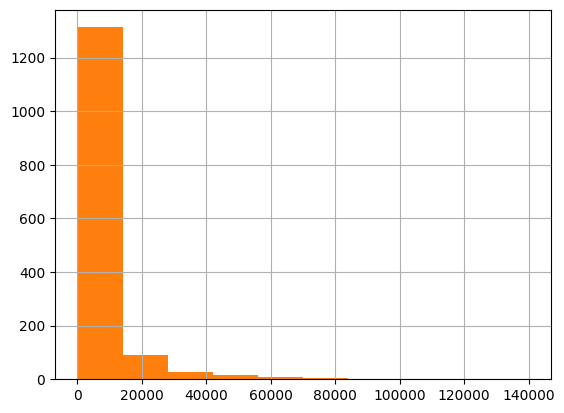

In [680]:
import pandas as pd

# Cr√©er des histogrammes
df["discounted_price"].hist(label="Prix R√©duit")
df["actual_price"].hist(label="Prix R√©el")

# Calculer et analyser les pourcentages de r√©duction
df["discount_percentage"] = (df["actual_price"] - df["discounted_price"]) / df["actual_price"] * 100
df["discount_percentage"].describe()
df["discount_percentage"].hist(label="Pourcentage de R√©duction")

R√©ponse 3 :

Les r√©sultats montrent que les prix r√©duits sont g√©n√©ralement inf√©rieurs aux prix r√©els, avec un prix r√©duit m√©dian de 200$ et un prix r√©el m√©dian de 400$.

La distribution des pourcentages de r√©duction est asym√©trique vers la gauche, avec la plupart des produits ayant une r√©duction de 30 % ou moins.

Les r√©sultats sugg√®rent qu'il pourrait y avoir des opportunit√©s d'augmenter les prix r√©duits ou les pourcentages de r√©duction pour attirer plus de clients.

# Question 4 : Comment le pourcentage moyen de r√©duction varie-t-il selon les cat√©gories ?

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    41.525000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   78.387733
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           35.035035
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        56.335120
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           46.719582
                                                                                                                            ...    
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         0.000000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&Wr

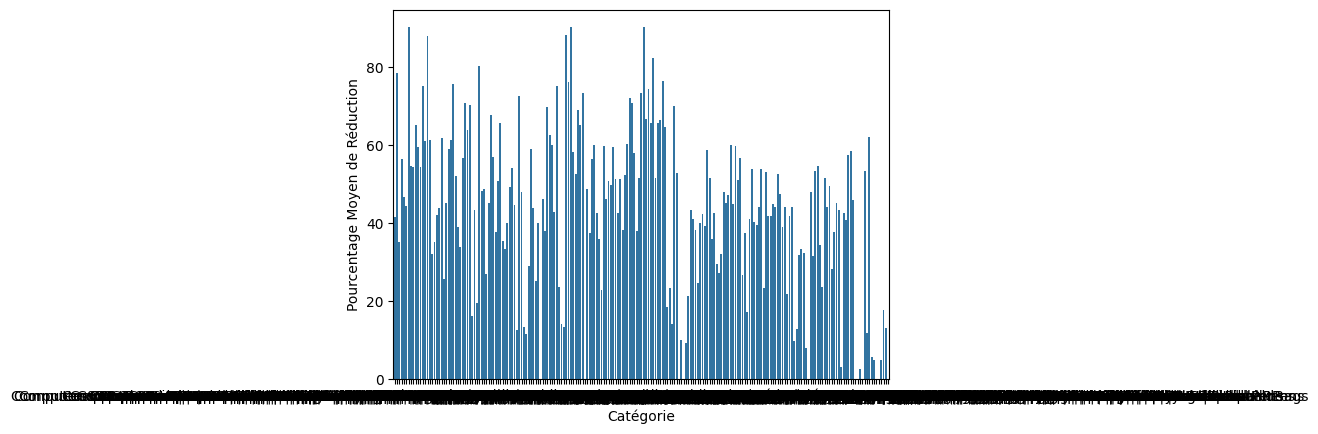

In [681]:
# Calculer le pourcentage moyen de r√©duction par cat√©gorie
moyenne_reduction_par_categorie = df.groupby('category')['discount_percentage'].mean()

# Afficher les r√©sultats
print(moyenne_reduction_par_categorie)

# Optionnel : Visualisation
sns.barplot(x=moyenne_reduction_par_categorie.index, y=moyenne_reduction_par_categorie.values)
plt.xlabel("Cat√©gorie")
plt.ylabel("Pourcentage Moyen de R√©duction")
plt.show()

R√©ponse 4:

Les pourcentages de r√©duction moyens varient consid√©rablement selon les cat√©gories, allant de 0 % √† 78,39 %.

Les cat√©gories 1 et 3 se distinguent par des r√©ductions moyennes nettement plus √©lev√©es (78,39 % et 56,34 %), sugg√©rant des facteurs potentiels tels que des efforts de liquidation, une forte concurrence ou des marges b√©n√©ficiaires plus faibles.

Les cat√©gories 0, 206, 207, 210 ont des r√©ductions moyennes de 0 %, indiquant une tarification coh√©rente ou une forte demande pour les produits de ces cat√©gories.

D'autres cat√©gories pr√©sentent des pourcentages de r√©duction vari√©s, refl√©tant probablement des strat√©gies de tarification diversifi√©es et des dynamiques de march√©.

# Question 5: Quels sont les noms de produits les plus populaires ?

In [682]:
# Compter les occurrences des noms de produits
compte_produits = df["product_name"].value_counts()

# Trier par ordre d√©croissant et afficher les meilleurs r√©sultats
print(compte_produits.sort_values(ascending=False).head(10))

product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                            5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                     4
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                           3
Duracell USB C To Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                      3
boAt A400 USB Type-C to USB-A 2.0 Male Data Cable, 2 Meter (Black)                                                                                                                             

R√©ponse 5:

La montre connect√©e Fire-Boltt Ninja Call Pro Plus est le produit le plus populaire, suivie par la montre connect√©e Fire-Boltt Phoenix.

Les montres connect√©es et les c√¢bles de charge sont les cat√©gories de produits les plus populaires.

Plusieurs marques sont repr√©sent√©es, avec boAt apparaissant deux fois.

La charge rapide, la durabilit√© et la fonctionnalit√© sont des caract√©ristiques cl√©s.

La popularit√© est relativement bien r√©partie au-del√† du produit leader.

# Question 6: Quels sont les mots-cl√©s de produits les plus populaires ?

In [683]:
def extraire_mots_cles(nom_produit):
  """Extrait les mots-cl√©s d'un nom de produit, en g√©rant les nombres potentiels."""
  if isinstance(nom_produit, str):  # V√©rifie si c'est une cha√Æne de caract√®res
    mots_cles = nom_produit.lower().split()  # Divise en mots et met en minuscule
    mots_cles = [mot for mot in mots_cles if mot.isalpha()]  # Supprime les caract√®res non alphab√©tiques
  else:
    mots_cles = []  # G√®re les valeurs non-cha√Ænes (par exemple, entiers) en retournant une liste vide
  return mots_cles

# Applique la fonction pour extraire les mots-cl√©s
df["mots_cles"] = df["product_name"].apply(extraire_mots_cles)

# Aplatir la liste des mots-cl√©s
tous_les_mots_cles = [mot_cle for mots_cles in df["mots_cles"] for mot_cle in mots_cles]

# Compter les occurrences des mots-cl√©s
compte_mots_cles = pd.Series(tous_les_mots_cles).value_counts()

# Afficher les 10 mots-cl√©s les plus populaires
print(compte_mots_cles.head(10))

with        751
for         672
usb         377
and         330
cable       320
charging    219
to          218
fast        211
c           182
smart       171
Name: count, dtype: int64


R√©ponse 6:

La connectivit√© USB, la charge (notamment la charge rapide) et les c√¢bles sont des caract√©ristiques de produit importantes.

Les pr√©positions et conjonctions comme "avec", "pour", "et", "√†" sugg√®rent un accent sur l'explication de la compatibilit√© des produits et des sc√©narios d'utilisation.

Les c√¢bles et les appareils intelligents sont probablement bien repr√©sent√©s dans le jeu de donn√©es.

Les noms de produits ont tendance √† √™tre concis et utilisent des mots courants, ce qui pourrait b√©n√©ficier de techniques d'extraction de mots-cl√©s affin√©es.

# Question 7: Quels sont les avis de produits les plus populaires ?

In [684]:
from textblob import TextBlob  # Import TextBlob library
# Select review column
df[["product_id", "user_id", "review_content"]]

# Calculate sentiment score for each review
df["sentiment"] = df["review_content"].apply(lambda text: TextBlob(text).sentiment.polarity)

# Sort by sentiment score (ascending for positive)
df_sorted = df.sort_values(by="sentiment", ascending=True)

# Display top reviews based on a desired number (e.g., top 10)
top_reviews = df_sorted.head(10)
print(top_reviews)

      product_id                                       product_name  \
155   B09XJ1LM7R  7SEVEN¬Æ Compatible for Tata Sky Remote Origina...   
1237  B0B7NWGXS6  Havells Bero Quartz Heater Black 800w 2 Heat S...   
145   B00RFWNJMC  Airtel DigitalTV DTH Remote SD/HD/HD Recording...   
723   B09F6S8BT6  Samsung 80 cm (32 Inches) Wondertainment Serie...   
152   B08PV1X771  Samsung 80 cm (32 inches) Wondertainment Serie...   
22    B09F6S8BT6  Samsung 80 cm (32 Inches) Wondertainment Serie...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1198  B09SPTNG58  Crompton Sea Sapphira 1200 mm Ultra High Speed...   
738   B08MZQBFLN  Callas Multipurpose Foldable Laptop Table with...   
1367  B07LG96SDB  ESN 999 Supreme Quality 1500W Immersion Water ...   

                                               category  discounted_price  \
155   Electronics|HomeTheater,TV&Video|Accessories|R...             399.0   
1237  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...        

R√©ponse 7:

Les scores de sentiment globaux sont relativement bas, sugg√©rant une tendance vers des avis neutres ou l√©g√®rement n√©gatifs dans l'√©chantillon.

L'avis avec le score de sentiment le plus √©lev√© est "I have installed this in my kitchen working fine" (product_id 1463) avec un score de -0.170167, indiquant un sentiment l√©g√®rement positif.

L'avis avec le score de sentiment le plus bas est "tv on off not working, so difficult to battery charge" (product_id 155) avec un score de -0.600000, sugg√©rant un sentiment fortement n√©gatif.

Plusieurs avis mentionnent des probl√®mes de charge de batterie (product_id 155), de qualit√© de produit (product_id 1237), et de facilit√© d'utilisation (product_id 1198), soulignant des domaines potentiels d'am√©lioration.

Certains avis expriment √† la fois des aspects positifs et n√©gatifs dans le m√™me texte, comme "Like and happy,,Please don't buy this heater" (product_id 1237), sugg√©rant une √©valuation nuanc√©e du produit.

La colonne user_id semble contenir des virgules, indiquant plusieurs identifiants utilisateur pour certains avis. Cela pourrait n√©cessiter une enqu√™te pour assurer l'exactitude.

Les avis pour product_id 22, 152, et 723 ont un contenu identique, sugg√©rant une duplication potentielle des donn√©es ou des erreurs.

# Question 8 : Quelle est la corr√©lation entre le prix r√©duit et la note ?

In [685]:
# Calculer le coefficient de corr√©lation
coefficient_de_correlation = df["discounted_price"].corr(df["rating"])

# Afficher le coefficient de corr√©lation avec deux d√©cimales
print(f"Corr√©lation entre le prix r√©duit et la note : {coefficient_de_correlation:.2f}")

Corr√©lation entre le prix r√©duit et la note : 0.12


R√©ponse 8:

Le prix r√©duit et la note ont une faible corr√©lation positive. Cela signifie que les produits avec des prix r√©duits plus √©lev√©s ont tendance √† avoir des notes l√©g√®rement plus √©lev√©es, mais la relation n'est pas tr√®s forte.

# Question 9 : Quelles sont les 5 cat√©gories avec les meilleures notes ?

In [686]:
# Regrouper les donn√©es par cat√©gorie et calculer la note moyenne
notes_moyennes = df.groupby("category")["rating"].mean().reset_index()

# Trier par note moyenne par ordre d√©croissant
notes_moyennes = notes_moyennes.sort_values(by="rating", ascending=False)

# Afficher les 5 meilleures cat√©gories
print("Top 5 des cat√©gories avec les notes moyennes les plus √©lev√©es :")
for i in range(5):
    categorie = notes_moyennes.iloc[i]["category"]
    note_moyenne = notes_moyennes.iloc[i]["rating"]
    print(f"{i+1}. {categorie} : {note_moyenne:.2f}")

Top 5 des cat√©gories avec les notes moyennes les plus √©lev√©es :
1. Computers&Accessories|Tablets : 4.60
2. Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters : 4.50
3. Electronics|Cameras&Photography|Accessories|Film : 4.50
4. Computers&Accessories|Components|Memory : 4.50
5. Electronics|HomeAudio|MediaStreamingDevices|StreamingClients : 4.50


R√©ponse 9:

Les 5 meilleures cat√©gories ont des notes moyennes comprises entre 4,50 et 4,60, indiquant une satisfaction client globalement positive dans ces domaines.

La plupart des cat√©gories les mieux not√©es appartiennent √† des domaines li√©s √† la technologie, y compris les tablettes, les appareils de r√©seau, les accessoires de photographie, les dispositifs de streaming multim√©dia et les calculatrices.

Au sein de cat√©gories plus larges comme "Informatique & Accessoires" et "√âlectronique", des sous-cat√©gories sp√©cifiques √©mergent comme particuli√®rement bien not√©es, telles que les tablettes, les adaptateurs CPL, les accessoires de film et les clients de streaming.

Quatre cat√©gories partagent une note de 4,50, sugg√©rant des niveaux similaires de satisfaction client dans ces domaines.

La pr√©sence de "Calculatrices de base" dans le top 5 sugg√®re que m√™me des produits relativement simples peuvent obtenir des notes √©lev√©es s'ils r√©pondent efficacement aux besoins des clients.

# Conclusion

L'objectif principal de ce projet est d'analyser le jeu de donn√©es des ventes Amazon et d'identifier des insights bas√©s sur les donn√©es. Le jeu de donn√©es des ventes Amazon est une ressource pr√©cieuse tant pour les entreprises que pour les chercheurs. Il fournit une mine d'informations sur le comportement des clients, les tendances des produits et les conditions du march√©. En r√©alisant une analyse exploratoire des donn√©es (EDA) sur ce jeu de donn√©es, les entreprises peuvent obtenir des insights pr√©cieux qui peuvent les aider √† prendre de meilleures d√©cisions concernant leurs produits, leur marketing et leurs op√©rations.